Installing the required libs -- Unsloth

In [ ]:
!pip install --no-deps bitsandbytes accelerate xformers==0.0.29.post3 peft trl triton cut_cross_entropy unsloth_zoo
!pip install sentencepiece protobuf datasets huggingface_hub hf_transfer
!pip install --no-deps unsloth


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.4/43.4 MB 20.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.1/76.1 MB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 348.0/348.0 kB 30.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 12.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 93.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 20.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 19.8 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Downloading the model from Hugging Face.

In [ ]:
!pip install torch
from unsloth import FastVisionModel # FastLanguageModel for LLMs
import torch
model, tokenizer = FastVisionModel.from_pretrained(
    "unsloth/Llama-3.2-11B-Vision-Instruct",
    load_in_4bit = True, # Use 4bit to reduce memory use. False for 16bit LoRA.
    use_gradient_checkpointing = "unsloth", # True or "unsloth" for long context
)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 129.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 94.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 60.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 12.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 59.7 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

model.safetensors.index.json:   0%|          | 0.00/375k [00:00<?, ?B/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/2.94G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/210 [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/477 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/55.9k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/17.2M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/454 [00:00<?, ?B/s]

chat_template.json:   0%|          | 0.00/5.15k [00:00<?, ?B/s]

Paramters of the Q-LoRA model.

In [ ]:
model = FastVisionModel.get_peft_model(
    model,
    finetune_vision_layers     = False, # False if not finetuning vision layers
    finetune_language_layers   = True, # False if not finetuning language layers
    finetune_attention_modules = True, # False if not finetuning attention layers
    finetune_mlp_modules       = True, # False if not finetuning MLP layers

    r = 16,           # The larger, the higher the accuracy, but might overfit
    lora_alpha = 16,  # Recommended alpha == r at least
    lora_dropout = 0,
    bias = "none",
    random_state = 3407,
    use_rslora = False,  # We support rank stabilized LoRA
    loftq_config = None, # And LoftQ
    # target_modules = "all-linear", # Optional now! Can specify a list if needed
)

Unsloth: Making `model.base_model.model.language_model` require gradients


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the CSV
dataset = pd.read_csv('/content/drive/MyDrive/augmented_synthetic_image_dataset.csv')

# Check the first few rows
print(dataset.head())


             image                                      image_details
0  anya forger.jpg  {\n    "Age": "Young Adult",\n    "Gender": "F...
1       ashito.jpg  {\n    "Age": "Teenager",\n    "Gender": "Male...
2    ayanakoji.jpg  {\n    "Age": "Young Adult",\n    "Gender": "M...
3      bachira.jpg  {\n    "Age": "Young Adult",\n    "Gender": "M...
4        barou.jpg  {\n    "Age": "Young Adult",\n    "Gender": "M...


In [ ]:
dataset["image"][0]

'anya forger.jpg'

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   image          504 non-null    object
 1   image_details  504 non-null    object
dtypes: object(2)
memory usage: 8.0+ KB


In [ ]:
from PIL import Image
import os

In [ ]:
image_base_path = "/content/drive/MyDrive/Anime Images"

Joining the image's location with its file path present in the dataset, to make it a complete path of the image.

In [ ]:
import os
dataset['image'] = dataset['image'].apply(lambda x: os.path.join(image_base_path, x))

Adding each image in the list

In [ ]:
og_dataset = []
for idx, row in dataset.iterrows():
    print(row['image'])
    image = Image.open(row['image']).convert('RGB')    # Load the image
    text = row['image_details']
    og_dataset.append({"image": image, "text": text})

/content/drive/MyDrive/Anime Images/anya forger.jpg
/content/drive/MyDrive/Anime Images/ashito.jpg
/content/drive/MyDrive/Anime Images/ayanakoji.jpg
/content/drive/MyDrive/Anime Images/bachira.jpg
/content/drive/MyDrive/Anime Images/barou.jpg
/content/drive/MyDrive/Anime Images/brook.jpg
/content/drive/MyDrive/Anime Images/bulma.jpg
/content/drive/MyDrive/Anime Images/chad.jpg
/content/drive/MyDrive/Anime Images/danzai.jpg
/content/drive/MyDrive/Anime Images/deku.jpg
/content/drive/MyDrive/Anime Images/draken.jpg
/content/drive/MyDrive/Anime Images/ego jinpachi.jpg
/content/drive/MyDrive/Anime Images/elizabeth.jpg
/content/drive/MyDrive/Anime Images/enri.jpg
/content/drive/MyDrive/Anime Images/eren.jpg
/content/drive/MyDrive/Anime Images/erza.jpg
/content/drive/MyDrive/Anime Images/fubuki.jpg
/content/drive/MyDrive/Anime Images/fukuda.jpg
/content/drive/MyDrive/Anime Images/gabimaru wife.jpg
/content/drive/MyDrive/Anime Images/gabimaru.jpg
/content/drive/MyDrive/Anime Images/goku.jpg
/

In [ ]:
instruction = """You are an expert anime character recognizer.

Task:
1. If the image has a **single character**, describe it in JSON format like:
{
    "Age": "Young Adult",
    "Gender": "Female",
    "Ethnicity": "Asian",
    "Hair Style": "Ponytail",
    "Hair Color": "Black",
    "Hair Length": "Long",
    "Eye Color": "Brown",
    "Body Type": "Slim",
    "Dress": "Green Yukata"
}
STRICTLY follow this format.

2. If there are **many characters**, simply output:
"too many characters"

3. If there is **no character** (landscape or background), simply output:
"no character"

Do not add any extra words outside the specified output."""

def convert_to_conversation(sample):
    conversation = [
        {
            "role": "user",
            "content": [
                {"type": "text", "text": instruction},
                {"type": "image", "image": sample["image"]}
            ]
        },
        {
            "role": "assistant",
            "content": [
                {"type": "text", "text": sample["text"]}
            ]
        },
    ]
    return {"messages": conversation}


In [ ]:
converted_dataset = [convert_to_conversation(sample) for sample in og_dataset]

In [ ]:
converted_dataset[0]

{'messages': [{'role': 'user',
   'content': [{'type': 'text',
     'text': 'You are an expert anime character recognizer.\n\nTask:\n1. If the image has a **single character**, describe it in JSON format like:\n{\n    "Age": "Young Adult",\n    "Gender": "Female",\n    "Ethnicity": "Asian",\n    "Hair Style": "Ponytail",\n    "Hair Color": "Black",\n    "Hair Length": "Long",\n    "Eye Color": "Brown",\n    "Body Type": "Slim",\n    "Dress": "Green Yukata"\n}\nSTRICTLY follow this format.\n\n2. If there are **many characters**, simply output:\n"too many characters"\n\n3. If there is **no character** (landscape or background), simply output:\n"no character"\n\nDo not add any extra words outside the specified output.'},
    {'type': 'image',
     'image': <PIL.Image.Image image mode=RGB size=151x335>}]},
  {'role': 'assistant',
   'content': [{'type': 'text',
     'text': '{\n    "Age": "Young Adult",\n    "Gender": "Female",\n    "Ethnicity": "Asian",\n    "Hair Style": "Side Ponytail",

In [ ]:
from unsloth import is_bf16_supported
from unsloth.trainer import UnslothVisionDataCollator
from trl import SFTTrainer, SFTConfig

FastVisionModel.for_training(model) # Enable for training!

trainer = SFTTrainer(
    model = model,
    tokenizer = tokenizer,
    data_collator = UnslothVisionDataCollator(model, tokenizer), # Must use!
    train_dataset = converted_dataset,
    args = SFTConfig(
        per_device_train_batch_size = 2,
        gradient_accumulation_steps = 4,
        warmup_steps = 5,
        max_steps = 30,
        # num_train_epochs = 1, # Set this instead of max_steps for full training runs
        learning_rate = 2e-4,
        fp16 = not is_bf16_supported(),
        bf16 = is_bf16_supported(),
        logging_steps = 1,
        optim = "adamw_8bit",
        weight_decay = 0.01,
        lr_scheduler_type = "linear",
        seed = 3407,
        output_dir = "outputs",
        report_to = "none",     # For Weights and Biases

        # You MUST put the below items for vision finetuning:
        remove_unused_columns = False,
        dataset_text_field = "",
        dataset_kwargs = {"skip_prepare_dataset": True},
        dataset_num_proc = 4,
        max_seq_length = 2048,
    ),
)

In [ ]:
trainer_stats = trainer.train()

==((====))==  Unsloth - 2x faster free finetuning | Num GPUs used = 1
   \\   /|    Num examples = 504 | Num Epochs = 1 | Total steps = 30
O^O/ \_/ \    Batch size per device = 2 | Gradient accumulation steps = 4
\        /    Data Parallel GPUs = 1 | Total batch size (2 x 4 x 1) = 8
 "-____-"     Trainable parameters = 52,428,800/11,000,000,000 (0.48% trained)
`use_cache=True` is incompatible with gradient checkpointing. Setting `use_cache=False`.


Unsloth: Will smartly offload gradients to save VRAM!


Step,Training Loss
1,2.128400
2,2.118500
3,2.037900
4,1.700000
5,1.435900
6,1.203900
7,0.952100
8,0.725300
9,0.541300
10,0.388500


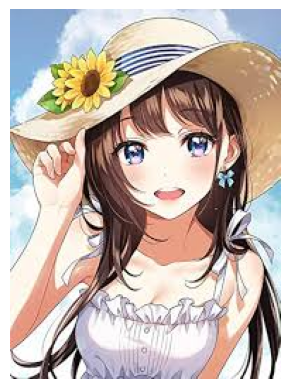

In [ ]:
# prompt: Display image on colab via drive path

from PIL import Image
import matplotlib.pyplot as plt

image_path = "/content/download.jpeg"

try:
  img = Image.open(image_path)
  plt.imshow(img)
  plt.axis('off')  # Hide axes
  plt.show()
except FileNotFoundError:
  print(f"Error: Image not found at {image_path}")
except Exception as e:
  print(f"An error occurred: {e}")


In [ ]:
FastVisionModel.for_inference(model) # Enable for inference!

image = Image.open("/content/download.jpeg").convert('RGB')
instruction = """You are an expert anime character recognizer.

Task:
1. If the image has a **single character**, describe it in JSON format like:
{
    "Age": "Young Adult",
    "Gender": "Female",
    "Ethnicity": "Asian",
    "Hair Style": "Ponytail",
    "Hair Color": "Black",
    "Hair Length": "Long",
    "Eye Color": "Brown",
    "Body Type": "Slim",
    "Dress": "Green Yukata"
}
STRICTLY follow this format.

2. If there are **many characters**, simply output:
"too many characters"

3. If there is **no character** (landscape or background), simply output:
"no character"

Do not add any extra words outside the specified output."""

messages = [
    {"role": "user", "content": [
        {"type": "image"},
        {"type": "text", "text": instruction}
    ]}
]
input_text = tokenizer.apply_chat_template(messages, add_generation_prompt = True)
inputs = tokenizer(
    image,
    input_text,
    add_special_tokens = False,
    return_tensors = "pt",
).to("cuda")

from transformers import TextStreamer
text_streamer = TextStreamer(tokenizer, skip_prompt = True)
_ = model.generate(**inputs, streamer = text_streamer, max_new_tokens = 128,
                   use_cache = True, temperature = 1.5, min_p = 0.1)

{
    "Age": "Young Adult",
    "Gender": "Female",
    "Ethnicity": "Asian",
    "Hair Style": "Long with bangs",
    "Hair Color": "Brown",
    "Hair Length": "Long",
    "Eye Color": "Purple",
    "Body Type": "Slim",
    "Dress": "White sleeveless dress",
    "Hat": "Sunhat"
}<|eot_id|>


Saving the Model.

In [ ]:
# @title Setup to enable bash commands
import locale

def getpreferredencoding():
    return "UTF-8"

locale.getpreferredencoding = getpreferredencoding

In [ ]:
Anime_recog_model = "json-recogniser-llama"

In [ ]:
model.save_pretrained(Anime_recog_model)

In [ ]:
!ls -lh {Anime_recog_model}

total 201M
-rw-r--r-- 1 root root 1.1K Apr 29 12:45 adapter_config.json
-rw-r--r-- 1 root root 201M Apr 29 12:45 adapter_model.safetensors
-rw-r--r-- 1 root root 5.1K Apr 29 12:45 README.md


In [ ]:
!cp -r {Anime_recog_model} /content/drive/MyDrive